## 이미지 파일 1개 BBox 확인

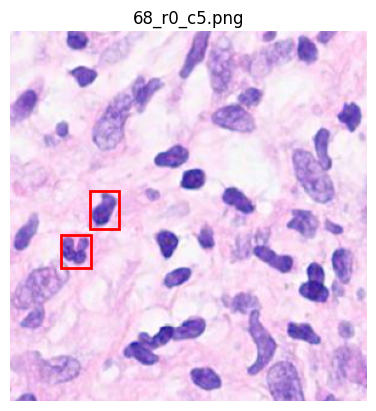

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

with open('annotation/blood_neutrophil.json', 'r') as f: 
    annotations = json.load(f)

img_key = '68_r0_c5' 
img_path = f"/Users/chonakyung/Library/CloudStorage/GoogleDrive-whskrud1007@gmail.com/내 드라이브/blood/Data/Cropped_Data/Test/{img_key}.png" 

img = Image.open(img_path)
fig, ax = plt.subplots(1)
ax.imshow(img)

for pred in annotations[img_key]['predictions']:
    cx, cy = pred['x'], pred['y']          
    w, h = pred['width'], pred['height']  

    x_min = cx - w / 2
    y_min = cy - h / 2

    rect = patches.Rectangle(
        (x_min, y_min), w, h,
        linewidth=2, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)


plt.title(f"{img_key}.png")
plt.axis('off')
plt.show()

## 이미지 파일 10개씩 BBox 확인

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

with open('annotation/blood_neutrophil.json', 'r') as f: 
    annotations = json.load(f)

img_keys = list(annotations.keys())
for i in range(0, len(img_keys), 10):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    for j, img_key in enumerate(img_keys[i:i+10]):
        img_path = f"/Users/chonakyung/Library/CloudStorage/GoogleDrive-whskrud1007@gmail.com/내 드라이브/blood/Data/Cropped_Data/Test/{img_key}.png" # 이미지 경로 설정(이부분을 바꿔서 확인해주시면 됩니다.)
        img = Image.open(img_path)
        axes[j].imshow(img)
        for pred in annotations[img_key].get('predictions', []):
            cx, cy = pred['x'], pred['y']
            w, h = pred['width'], pred['height']

            x_min = cx - w / 2
            y_min = cy - h / 2

            rect = patches.Rectangle(
                (x_min, y_min), w, h,
                linewidth=2, edgecolor='r', facecolor='none'
            )
            axes[j].add_patch(rect)

        axes[j].set_title(f"{img_key}.png")
        axes[j].axis('off')

    for k in range(j+1, 10):
        axes[k].axis('off')
    plt.tight_layout()
    plt.show()